#### Import Modules

In [64]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import pmdarima as pm # v 1.8.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import pandas_profiling as pp # v 3.6.3
import sweetviz as sv # 2.2.1
import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
ww.filterwarnings("ignore")
%matplotlib inline

#### Read in the dataset

In [36]:
df = pd.read_csv(r"C:\Users\rodge\OneDrive\Desktop\Data 300 GitHub\DATA-300-Statistical-Machine-Learning-Fall-2023-\Data\weather_2016_2020_daily.csv")

#### Exploratory Data Analysis (EDA)

In [4]:
df.columns, df.shape, df.dtypes #1552 rows and 7 columns

(Index(['date', 'average_temperature', 'average_dewpoint', 'average_humidity',
        'average_windspeed', 'average_pressure', 'precipitation'],
       dtype='object'),
 (1552, 7),
 date                    object
 average_temperature    float64
 average_dewpoint       float64
 average_humidity       float64
 average_windspeed      float64
 average_pressure       float64
 precipitation          float64
 dtype: object)

#### Missing Values? 

In [5]:
df.isna().sum()

date                   0
average_temperature    0
average_dewpoint       0
average_humidity       0
average_windspeed      0
average_pressure       0
precipitation          0
dtype: int64

#### Show 1st 5 rows of dataset

In [6]:
df.head()

date  average_temperature  average_dewpoint  average_humidity  \
0  1/6/2016                 74.8              71.4              89.4   
1  2/6/2016                 71.2              70.3              96.8   
2  3/6/2016                 72.1              70.0              93.6   
3  4/6/2016                 71.2              70.0              96.1   
4  5/6/2016                 73.8              70.0              88.7   

   average_windspeed  average_pressure  precipitation  
0                9.5              29.8           0.00  
1                7.8              29.8           4.33  
2                4.7              29.8           3.18  
3                7.0              29.7           2.37  
4                7.7              29.7           0.39

#### Show last 5 rows of data set

In [7]:
df.tail()

date  average_temperature  average_dewpoint  average_humidity  \
1547  8/26/2020                 83.4              75.7              78.2   
1548  8/27/2020                 87.1              72.0              62.7   
1549  8/28/2020                 86.5              77.2              75.6   
1550  8/29/2020                 87.5              75.8              70.4   
1551  8/30/2020                 86.9              76.3              72.6   

      average_windspeed  average_pressure  precipitation  
1547               12.4              29.7           0.01  
1548                8.0              29.6           0.00  
1549                8.1              29.7           0.00  
1550                6.5              29.7           0.22  
1551                5.5              29.7           0.00

#### Summary Statistics

In [8]:
df.describe()

average_temperature  average_dewpoint  average_humidity  \
count          1552.000000       1552.000000       1552.000000   
mean             71.752320         62.147423         74.365786   
std              12.490526         13.626795         11.700804   
min              27.600000         13.200000         31.500000   
25%              63.175000         54.075000         67.400000   
50%              74.300000         66.600000         75.000000   
75%              82.000000         73.400000         82.700000   
max              90.000000         79.800000         99.900000   

       average_windspeed  average_pressure  precipitation  
count        1552.000000       1552.000000    1552.000000  
mean            7.734987         29.903479       0.157893  
std             2.989969          0.160434       0.658309  
min             1.600000         28.800000       0.000000  
25%             5.700000         29.800000       0.000000  
50%             7.300000         29.900000       0.000000  
75%             9.400000         30.000000       0.020000  
max            23.900000         30.600000      13.430000

#### Visualize data set

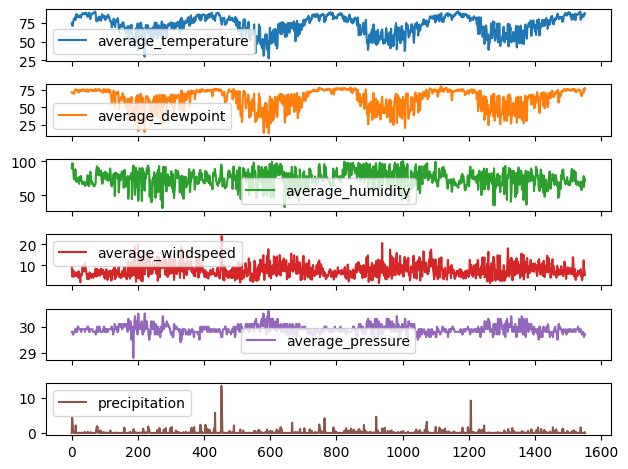

In [9]:
df.plot(subplots=True)
plt.tight_layout()
plt.show()

#### Use Pandas Profiling

In [10]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### we can also use sweetviz

In [11]:
my_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### For timeseries data, the first thing you want to do is to make sure Python reads the date column as a date

In [13]:
df["date"] = pd.to_datetime(df["date"]) # Python can now read this column as a date column.

In [14]:
df.dtypes

date                   datetime64[ns]
average_temperature           float64
average_dewpoint              float64
average_humidity              float64
average_windspeed             float64
average_pressure              float64
precipitation                 float64
dtype: object

#### Sort the dataframe by the date column, so that the variables are arranged in chronological order.

In [15]:
df = df.sort_values("date") # Use parameter "ascending = False" is you want to sort in descending order.

In [16]:
df.head() # The data runs from 2016-01-06 to 2020-12-08

date  average_temperature  average_dewpoint  average_humidity  \
0   2016-01-06                 74.8              71.4              89.4   
30  2016-01-07                 84.9              74.0              71.6   
61  2016-01-08                 86.5              73.3              67.3   
92  2016-01-09                 86.2              73.3              67.1   
122 2016-01-10                 71.1              59.4              68.7   

     average_windspeed  average_pressure  precipitation  
0                  9.5              29.8           0.00  
30                 5.7              29.9           0.00  
61                 6.0              29.9           0.00  
92                 6.3              29.8           0.01  
122                3.3              29.9           0.00

In [17]:
df.tail()

date  average_temperature  average_dewpoint  average_humidity  \
1411 2020-12-04                 79.5              64.0              63.0   
1441 2020-12-05                 75.2              65.4              72.2   
1472 2020-12-06                 79.8              59.0              50.8   
1502 2020-12-07                 86.9              74.9              68.9   
1533 2020-12-08                 88.3              74.5              65.6   

      average_windspeed  average_pressure  precipitation  
1411               11.8              29.5           0.00  
1441               13.4              29.9           0.00  
1472                7.5              30.1           0.00  
1502                6.0              29.8           0.00  
1533                6.7              29.8           0.07

#### For timeseries before we fit machine learning models, we need to make sure that the data is stationary. For this we use the Dickey Fuller test or variations of it. Below we define a function that takes in one - time series variable and returns the ADF statistic, lags used, p value and observations. 

#### This function only returns the ADF value at the 5% significant level

In [18]:
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

#### Below loop thorugh all the columns in the data set and check whether each variable is stationary or not -using the function above

In [19]:
for i in df.columns:
    print(i), adfuller_test(df[i])
    print()

date
ADF Test Statistic : 5.830847026975962
p-value : 1.0
#Lags Used : 23
Number of Observations : 1528
weak evidence against null hypothesis,indicating it is non-stationary 

average_temperature
ADF Test Statistic : -4.062418684351725
p-value : 0.0011167213786318435
#Lags Used : 24
Number of Observations : 1527
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary

average_dewpoint
ADF Test Statistic : -5.257348290879508
p-value : 6.706816612465683e-06
#Lags Used : 18
Number of Observations : 1533
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary

average_humidity
ADF Test Statistic : -26.64910983129119
p-value : 0.0
#Lags Used : 0
Number of Observations : 1551
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary

average_windspeed
ADF Test Statistic : -27.908786365493384
p-value : 0.0
#Lags Used : 0
Number of Observations : 1551
strong evidence against th

#### ADF Statistics: 1%, 5%, 10%

In [20]:
for i in df.columns:
    print(i)
    print()
    print(adfuller(df[i]))
    print() # This is how you obtain the raw ADF statistics for each variable

date

(5.830847026975962, 1.0, 23, 1528, {'1%': -3.4346368583924454, '5%': -2.8634333822589966, '10%': -2.5677780093918754}, 102519.26425497228)

average_temperature

(-4.062418684351725, 0.0011167213786318435, 24, 1527, {'1%': -3.434639670505874, '5%': -2.8634346233980663, '10%': -2.567778670304311}, 11007.105506731537)

average_dewpoint

(-5.257348290879508, 6.706816612465683e-06, 18, 1533, {'1%': -3.4346228529495666, '5%': -2.8634272008756785, '10%': -2.5677747177787733}, 11532.187042762911)

average_humidity

(-26.64910983129119, 0.0, 0, 1551, {'1%': -3.434573182279212, '5%': -2.863405278205157, '10%': -2.567763043900464}, 11612.400644056343)

average_windspeed

(-27.908786365493384, 0.0, 0, 1551, {'1%': -3.434573182279212, '5%': -2.863405278205157, '10%': -2.567763043900464}, 7507.944206424154)

average_pressure

(-15.263048237790148, 4.8311554630917055e-28, 3, 1548, {'1%': -3.4345813803729857, '5%': -2.863408896544693, '10%': -2.567764970671501}, -1542.9706705943381)

precipitati

#### Check for stationarity using KPSS test

#### Kwiatkowski-Phillips-Schmidt-Shin test for stationarity. See implementation here https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html . Paper here : https://www.sciencedirect.com/science/article/abs/pii/030440769290104Y

In [21]:
for i in df.columns:
    print (i)
    print()
    print (stattools.kpss(df[i], regression='ct'))
    print ()


date

(0.3655500934117103, 0.01, 25, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_temperature

(0.21435770381360833, 0.010615861069896875, 20, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_dewpoint

(0.15421383232812824, 0.043155139726559794, 19, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_humidity

(0.4452250781189071, 0.01, 14, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_windspeed

(0.1534044188135936, 0.043829650988671996, 13, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_pressure

(0.15829307161830464, 0.03975577365141279, 16, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

precipitation

(0.04563196707251959, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



#### KPSS tests for differenced columns

In [22]:
for i in df.columns:
    print (i)
    print()
    print (stattools.kpss(df[i].diff().tail(len(df)-1), regression='ct'))
    print ()

date

(0.9186790874131056, 0.01, 6, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_temperature

(0.15726656674995235, 0.040611194375039704, 361, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_dewpoint

(0.044109944829223514, 0.1, 139, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_humidity

(0.10170824386394674, 0.1, 259, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_windspeed

(0.10392223696565535, 0.1, 313, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

average_pressure

(0.06445395601834812, 0.1, 207, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

precipitation

(0.49999999999987715, 0.01, 1550, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



#### Now that we have determined that each of the variables are stationary - except for the date, we want to produce the Autocorrelation Function (ACF) Plot  & Partial Autocorrelation Function (PACF) plots for each variable. The ACF plot determines the number of Moving Average (MA) terms you can use and the PACF plot determines the number of Autoregressive (AR) Terms that you can use.  

In [23]:
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)

#### Below we plot the ACF and PACF plots for all the series in the data 

date

average_temperature

average_dewpoint

average_humidity

average_windspeed

average_pressure

precipitation



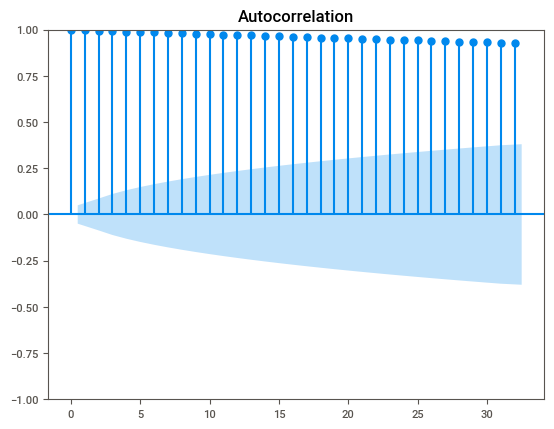

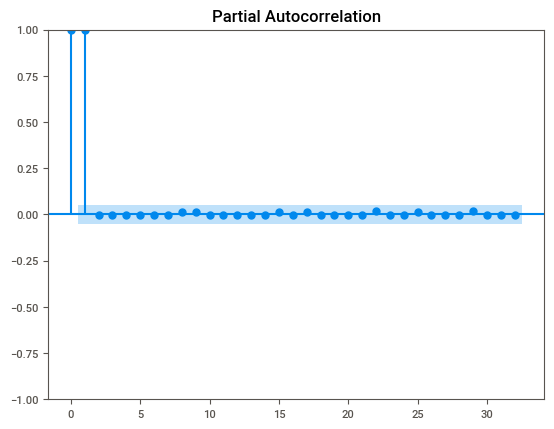

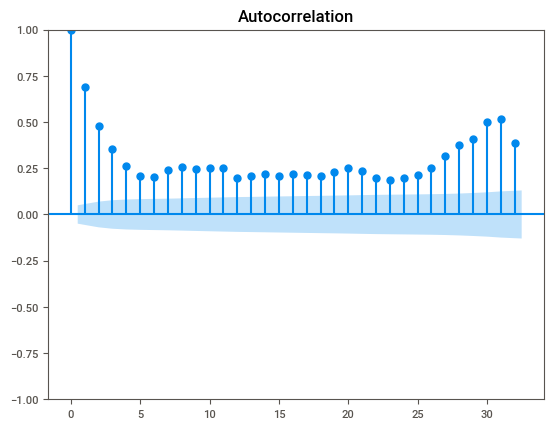

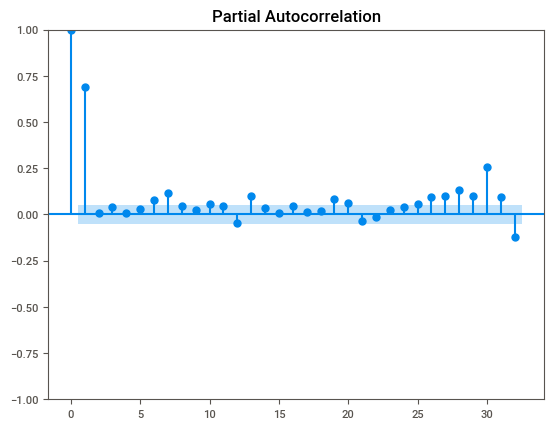

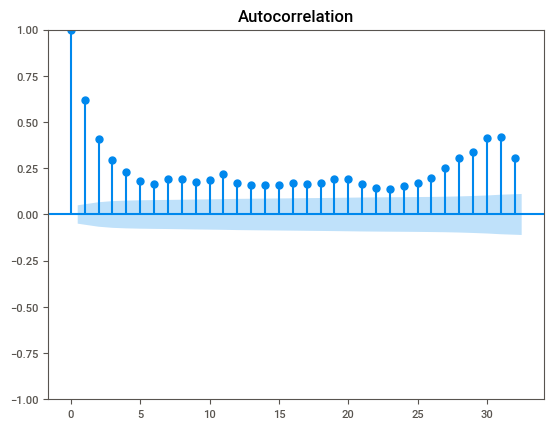

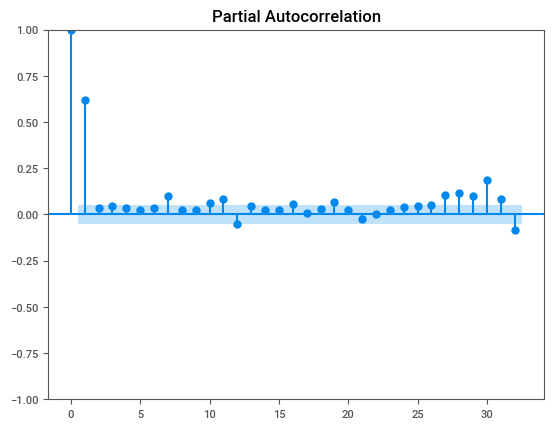

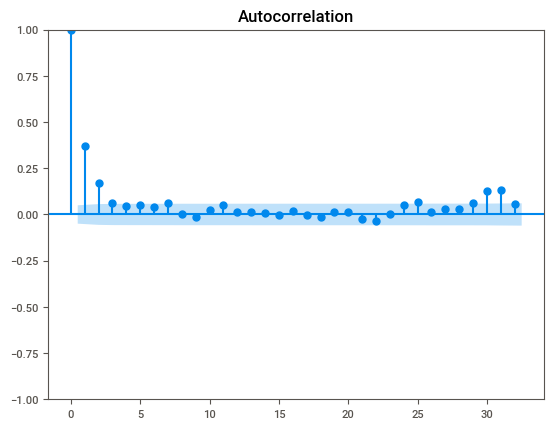

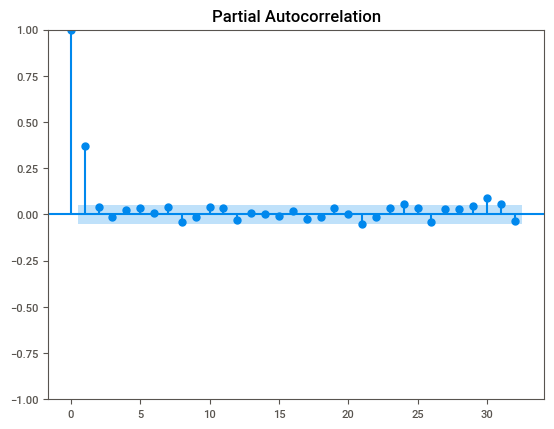

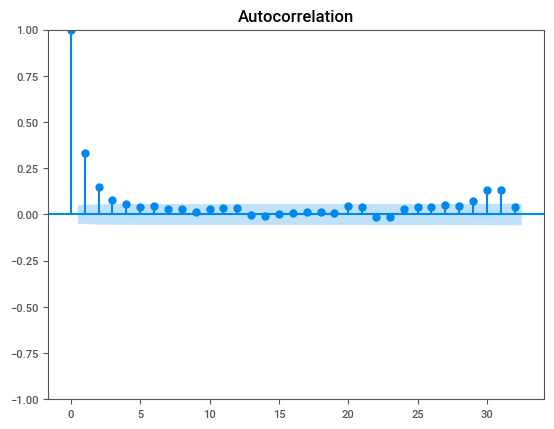

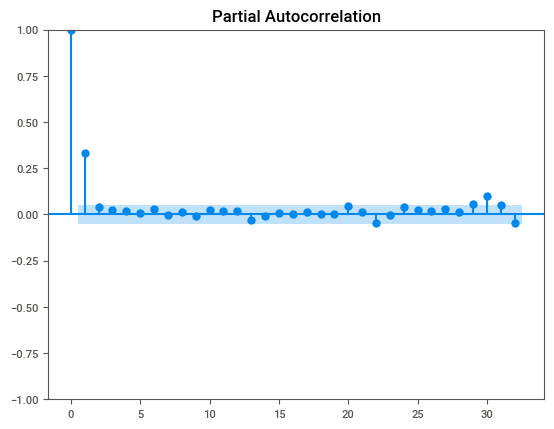

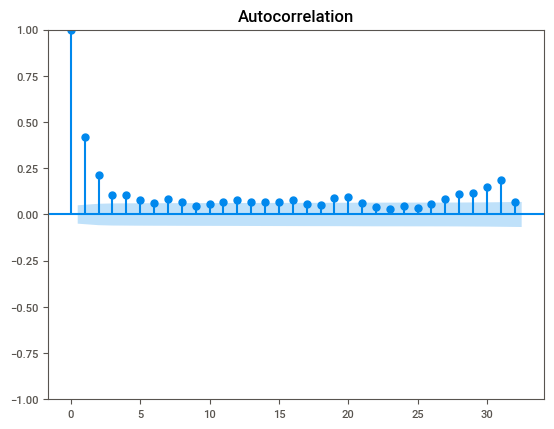

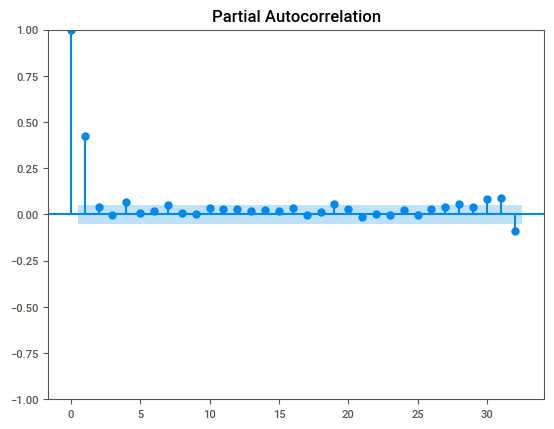

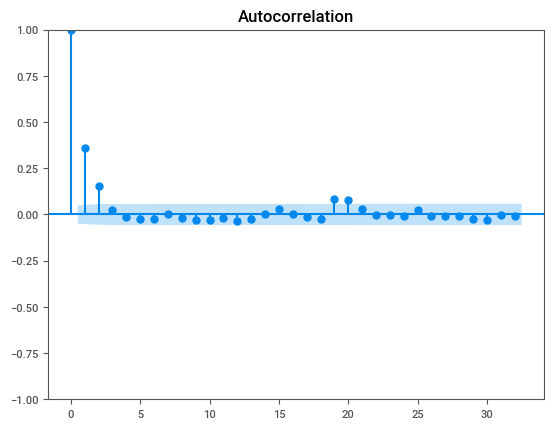

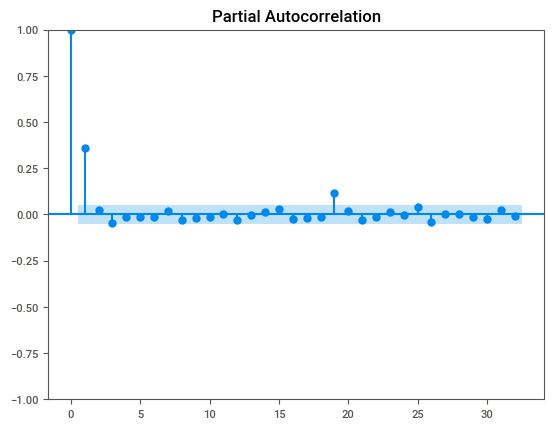

In [24]:
for i in df.columns:
    print(i)
    acf_pacf(df[i])
    print()
    

#### Alternatively, you can obtain the Autocorrelation, Differencing, and Moving Average orders by using an auto - arima procedure developed by Hyndman and Khandakar (2008). See here : https://www.jstatsoft.org/article/view/v027i03 . This procedure search to find the orders and returns the optimal one based on a user specified criteria. 

In [25]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

#### Loop through all the columns in the data set and return the optima p, d, q numbers.

In [26]:
columns = ['average_temperature', 'average_dewpoint', 'average_humidity',
       'average_windspeed', 'average_pressure']

In [27]:
for i in columns:
    print(i)
    arimamodel(df[i])
    print()

average_temperature
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11250.462, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12244.893, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11248.576, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11558.999, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17716.763, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11250.473, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11252.428, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.637 seconds

average_dewpoint
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11758.507, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12515.151, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11759.099, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11976.867, Time=0.11 sec
 

#### Differencing of timeseries data

In [ ]:
df = pd.read_csv(r"C:\Users\rodge\OneDrive\Desktop\Data 300 GitHub\DATA-300-Statistical-Machine-Learning-Fall-2023-\Data\weather_2016_2020_daily.csv")

In [37]:
df = df[['average_temperature', 'average_dewpoint', 'average_humidity',
       'average_windspeed', 'average_pressure', 'precipitation']] #### Here we remove the date column because we cannot plot it

#### Plot raw variables

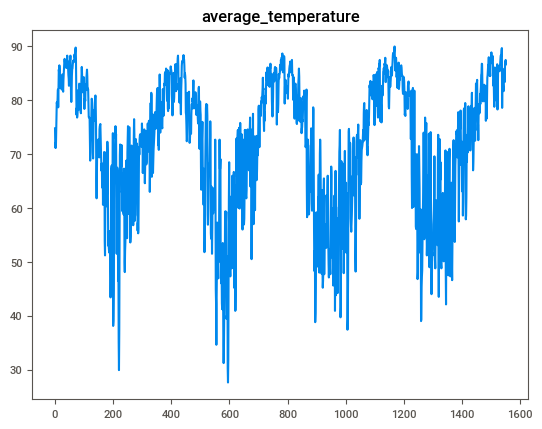

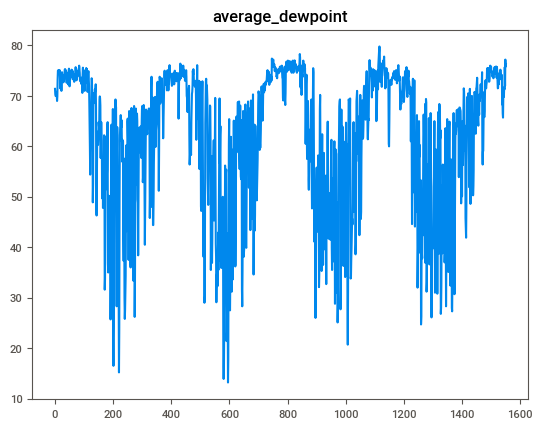

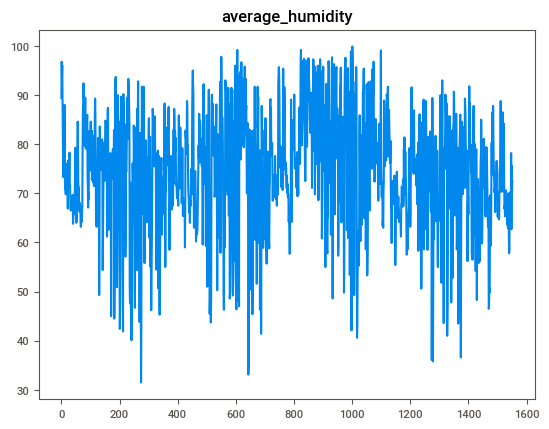

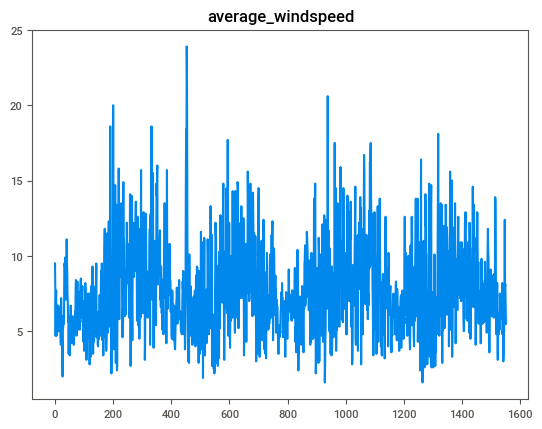

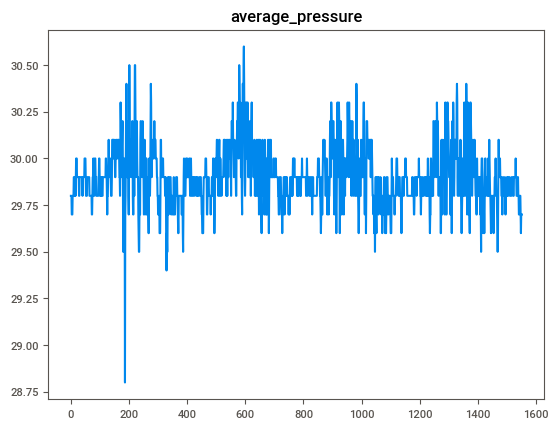

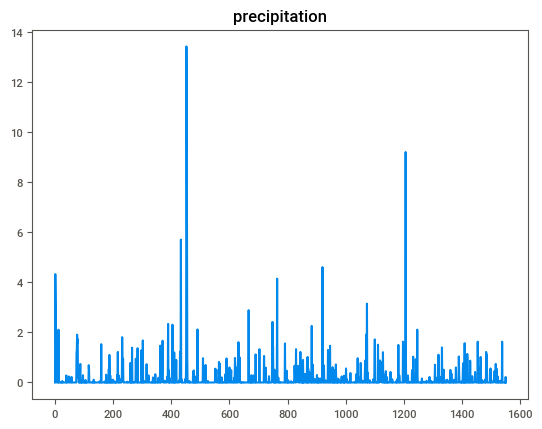

In [38]:
for i, col in enumerate(df.columns):
    df[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

#### Plot once differenced variables

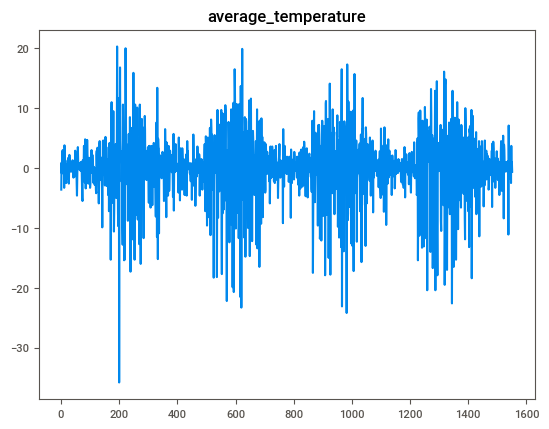

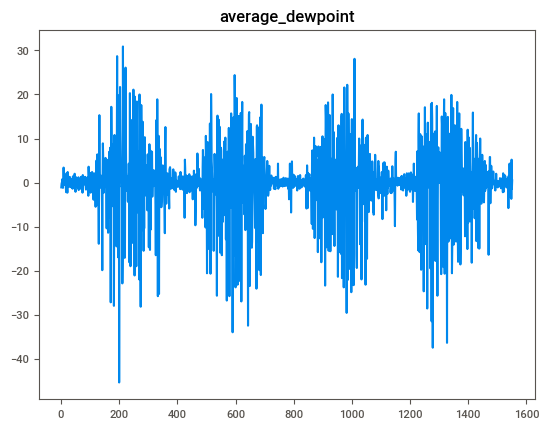

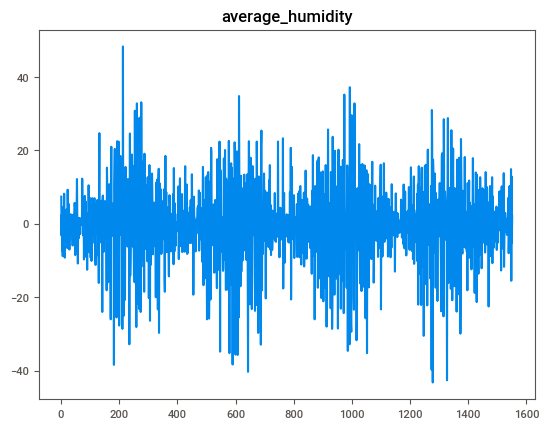

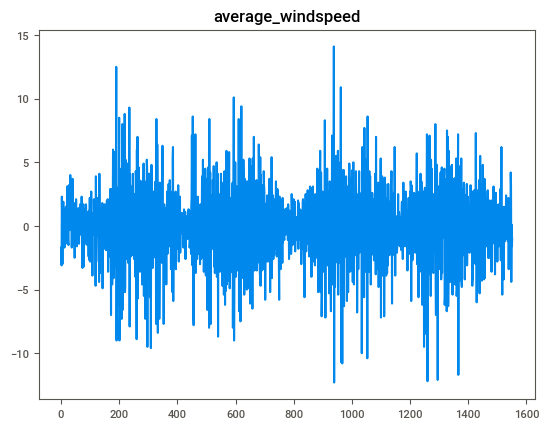

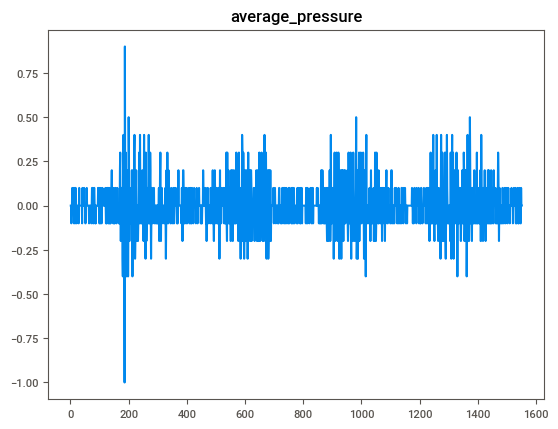

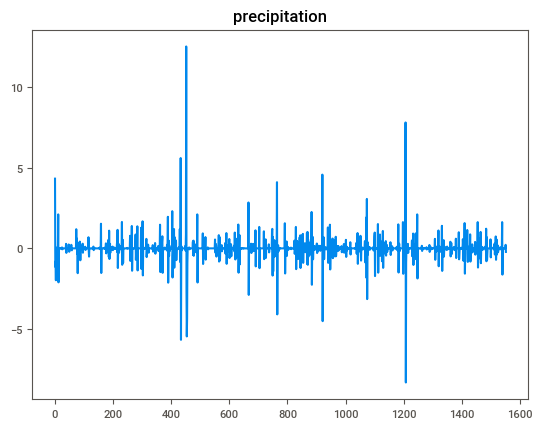

In [39]:
for i, col in enumerate(df.columns):
    df[col].diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() # df[col].diff()

#### Plot twice differenced variables

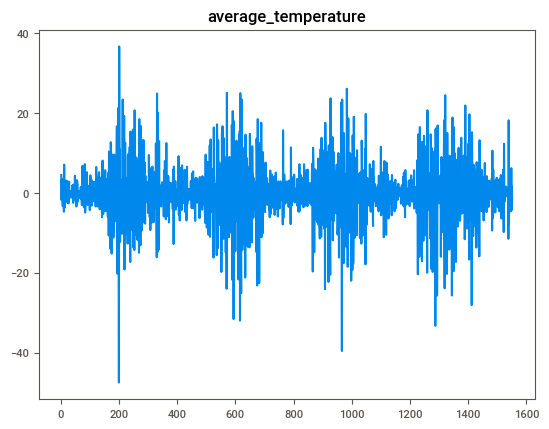

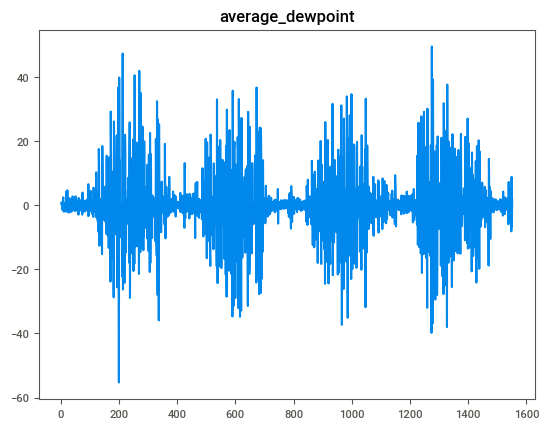

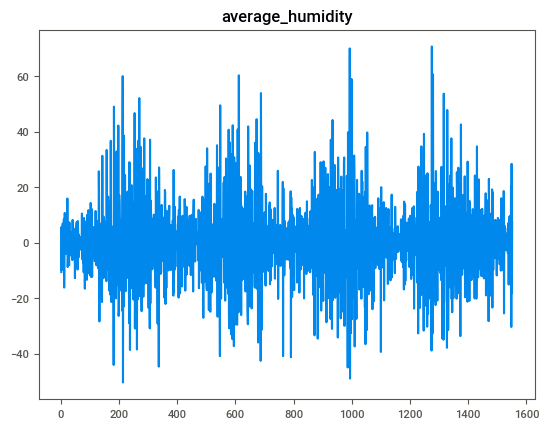

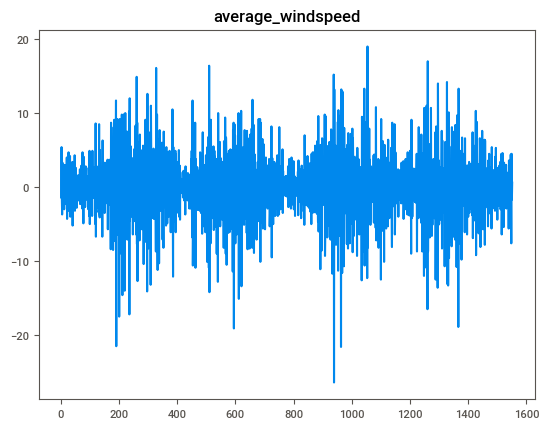

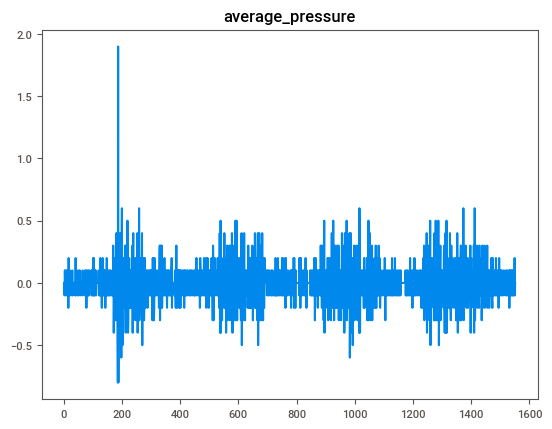

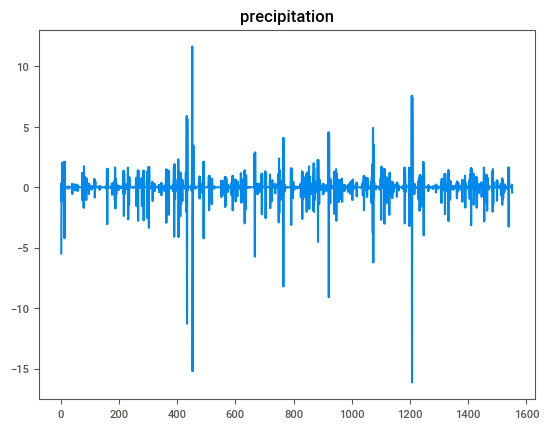

In [40]:
for i, col in enumerate(df.columns):
    df[col].diff().diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() # df[col].diff().diff()

#### Fit the model based on optimal ARIMA order. I will use only on variable for demonstration. You can pick any of the rest and the same procedure will still apply. 

#### I have picked, average_dewpoint ARIMA(2,0,1)

In [78]:
model = sm.tsa.arima.ARIMA(df['average_dewpoint'].head(int(0.7*len(df))), order=(2, 0, 1))
results = model.fit()

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       average_dewpoint   No. Observations:                 1086
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3698.418
Date:                Mon, 25 Sep 2023   AIC                           7406.837
Time:                        09:29:58   BIC                           7431.788
Sample:                             0   HQIC                          7416.282
                               - 1086                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5842      1.839     33.486      0.000      57.980      65.189
ar.L1          0.5936      0.068      8.746      0.000       0.461       0.727
ar.L2          0.1078      0.061      1.781      0.075      -0.011       0.226
ma.L1          0.5279      0.056      9.373      0.000       0.417       0.638
sigma2        53.0825      1.917     27.689      0.000      49.325      56.840
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              1230.03
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.51
Prob(H) (two-sided):                  0.15   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecast over the test set. 

int(0.7*len(df)) #### This is the training set. Which are the first 70% of data points for the average dew_point series. You want the test set to start right after it.

In [80]:
df['average_dewpoint_forecast']=results.predict(start = int(0.7*len(df))+1, end=len(df) , dynamic=True)

#### Plot to see what the forecast looks like. Not so good. 

<AxesSubplot: >

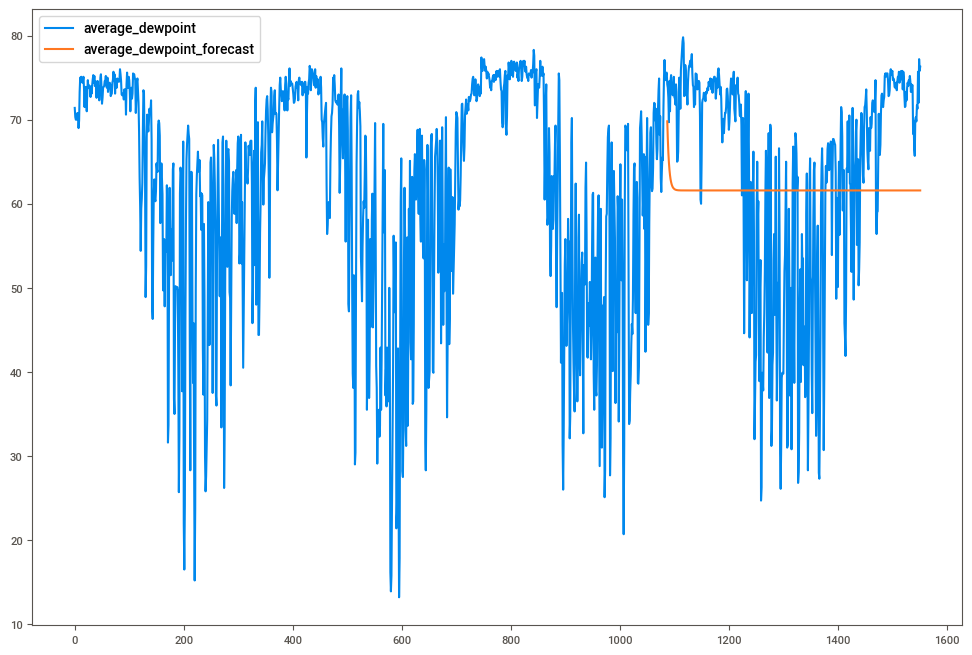

In [81]:
df[['average_dewpoint','average_dewpoint_forecast']].plot(figsize=(12,8))

#### Error metrics on the test set : int(0.3*len(df)

In [74]:
mean_absolute_error(df['average_dewpoint_forecast'].tail(int(0.3*len(df))),df['average_dewpoint'].tail(int(0.3*len(df))))

6.321491404911384

In [75]:
mean_squared_error(df['average_dewpoint_forecast'].tail(int(0.3*len(df))),df['average_dewpoint'].tail(int(0.3*len(df))))

73.15627132888189

In [76]:
mean_absolute_percentage_error(df['average_dewpoint_forecast'].tail(int(0.3*len(df))),df['average_dewpoint'].tail(int(0.3*len(df))))

0.10810047562980069